# Assignment 3

## Question 1: Designing CFGs for NLP

### Question 1.1

In order to extend the CFG to support Count/Mass Nouns we create the rule: N -> NC | NM. DET are also divided into DETC and DETNC.

By adding the rule: DETCNC -> DETC NC |DETC ADJ NC we are making sure that counting DET will only appear with Count Nouns.

When dealing with Pronouns we don't need to encode gender in the grammar because there aren't any differences between Male and Female in English. On the contrary, Hebrew would require those type of rules.

singular / plural are handled by the ruls: proNN -> proNNS | proNNP.

nominative / accusative cases handled by the rule: NP -> NPA | NPN. (NP can be of type NPN for nominative case or NPA for accusative case)


In [1]:
import nltk
from nltk import CFG
from nltk import Tree
import IPython

The sentence: 
John left
The parse tree: 
(S (NP (NPA (PN John))) (VP (IV left))) 



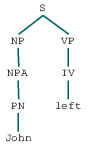

The sentence: 
John eats bread
The parse tree: 
(S
  (NP (NPA (PN John)))
  (VP (TV (TVS eats)) (NP (NPA (N (NM bread)))))) 



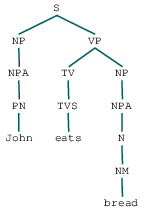

The sentence: 
John loves Mary
The parse tree: 
(S (NP (NPA (PN John))) (VP (TV (TVS loves)) (NP (NPA (PN Mary))))) 



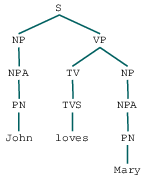

The sentence: 
They love Mary
The parse tree: 
(S
  (NP (NPN (proNN (proNNP They))))
  (VP (TV (TVP love)) (NP (NPA (PN Mary))))) 



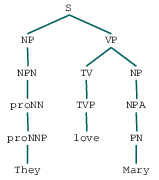

The sentence: 
They love her
The parse tree: 
(S
  (NP (NPN (proNN (proNNP They))))
  (VP (TV (TVP love)) (NP (NPA (ProNA her))))) 



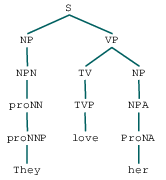

The sentence: 
She loves them
The parse tree: 
(S
  (NP (NPN (proNN (proNNS She))))
  (VP (TV (TVS loves)) (NP (NPA (ProNA them))))) 



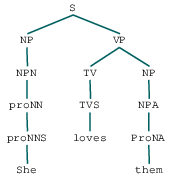

The sentence: 
Everybody loves John
The parse tree: 
(S
  (NP (NPN (proNN (proNNS Everybody))))
  (VP (TV (TVS loves)) (NP (NPA (PN John))))) 



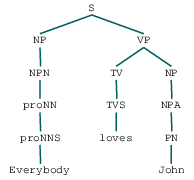

The sentence: 
A boy loves Mary
The parse tree: 
(S
  (NP (DETN (DETCNC (DETC A) (NC (NCS boy)))))
  (VP (TV (TVS loves)) (NP (NPA (PN Mary))))) 



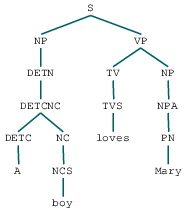

The sentence: 
The boy loves Mary
The parse tree: 
(S
  (NP (DETN (DETNCN (DETNC The) (N (NC (NCS boy))))))
  (VP (TV (TVS loves)) (NP (NPA (PN Mary))))) 



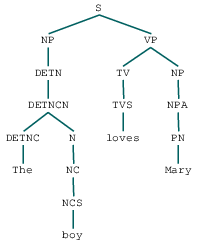

The sentence: 
Some boys love Mary
The parse tree: 
(S
  (NP (DETN (DETCNC (DETC Some) (NC (NCP boys)))))
  (VP (TV (TVP love)) (NP (NPA (PN Mary))))) 



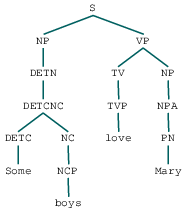

The sentence: 
John gave Mary a heavy book
The parse tree: 
(S
  (NP (NPA (PN John)))
  (VP
    (TV (TVG gave))
    (NP (NPA (PN Mary)))
    (NP (DETN (DETCNC (DETC a) (ADJ heavy) (NC (NCS book))))))) 



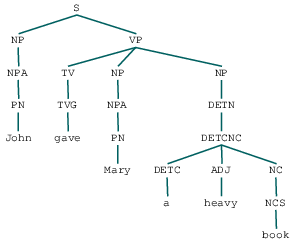

The sentence: 
John gave it to Mary
The parse tree: 
(S
  (NP (NPA (PN John)))
  (VP
    (TV (TVG gave))
    (PPN (NP (NPA (ProNA it))) (PP (Prep to) (NP (NPA (PN Mary))))))) 



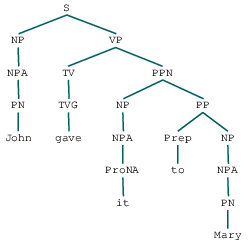

The sentence: 
John likes butter
The parse tree: 
(S
  (NP (NPA (PN John)))
  (VP (TV (TVS likes)) (NP (NPA (N (NM butter)))))) 



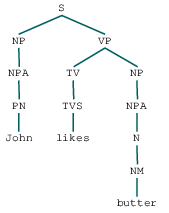

The sentence: 
John moves a chair
The parse tree: 
(S
  (NP (NPA (PN John)))
  (VP
    (TV (TVS moves))
    (NP (DETN (DETCNC (DETC a) (NC (NCS chair))))))) 



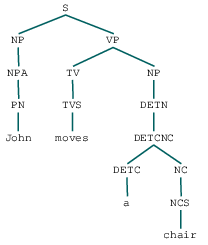

In [2]:
sg = """
S -> NP VP
DETNCN -> DETNC N 
NPA -> N | ProNA | PN 
NPN -> proNN
DETN ->  DETCNC | DETNCN 
DETCNC -> DETC NC |DETC ADJ NC
N -> NC | NM 
NC -> NCS | NCP
NCS -> 'boy' | 'book' | 'chair'
NCP -> 'boys'
NM -> "bread" |'butter'
PN -> 'Mary' | 'John' 
ProNA ->  'her' | 'them' |'it'
proNN -> proNNS | proNNP
proNNP -> 'They'
proNNS -> 'She' |'Everybody'
IV -> 'left'
TV -> TVS | TVP | TVG
TVG -> 'gave'
TVS -> 'eats' | 'loves' |'likes' |'moves'
TVP -> 'love'
DETC -> 'A' |'Some' |'a'
DETNC -> 'The'
PPN -> NP PP
PP -> Prep NP 
Prep -> 'to'
ADJ -> 'heavy'
NP -> NPA | NPN | DETN
VP -> IV | TV NP NP | TV NP | TV PPN
"""

g = CFG.fromstring(sg)

sr_parser = nltk.ChartParser(g)

def parse_sentence(sent):
    tokens = sent.split()
    trees = sr_parser.parse(tokens)
    for tree in trees:
        print("The sentence: ")
        print(sent)
        print("The parse tree: ")
        print(tree, "\n")
        IPython.core.display.display(tree)


sentences = ["John left", "John eats bread", "John loves Mary", "They love Mary", "They love her", 
            "She loves them", "Everybody loves John", "A boy loves Mary",
            "The boy loves Mary", "Some boys love Mary", "John gave Mary a heavy book", 
             "John gave it to Mary", "John likes butter", "John moves a chair"]

for s in sentences:
       parse_sentence(s)


We want to extend the grammar to make sure subject and verb agree in number. 

we split each of the above rules to plural case and singular case. For example, Noun can now be Np or Ns. 

We do it for almost every rule except for rules that don't have those cases like rules for Adjectives, Determiners that takes either plural or singular ('the' for example) or Mass Nouns.

The sentence: 
John left
The parse tree: 
(S (NPs (NPAs (PNs John))) (VPs (IV left))) 



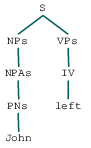

The sentence: 
John eats bread
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs (TVS eats) (NPs (NPAs (Ns (NM bread)))))) 



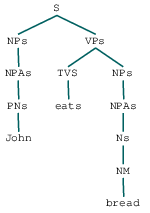

The sentence: 
John loves Mary
The parse tree: 
(S (NPs (NPAs (PNs John))) (VPs (TVS loves) (NPs (NPAs (PNs Mary))))) 



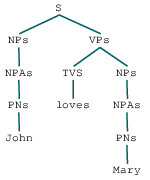

The sentence: 
They love Mary
The parse tree: 
(S (NPp (proNNP They)) (VPp (TVP love) (NPs (NPAs (PNs Mary))))) 



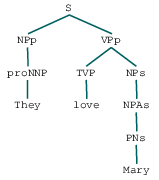

The sentence: 
They love her
The parse tree: 
(S (NPp (proNNP They)) (VPp (TVP love) (NPs (NPAs (ProNA her))))) 



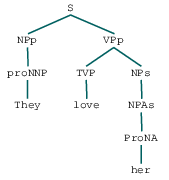

The sentence: 
She loves them
The parse tree: 
(S (NPs (proNNS She)) (VPs (TVS loves) (NPs (NPAs (ProNA them))))) 



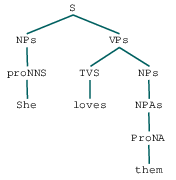

The sentence: 
Everybody loves John
The parse tree: 
(S
  (NPs (proNNS Everybody))
  (VPs (TVS loves) (NPs (NPAs (PNs John))))) 



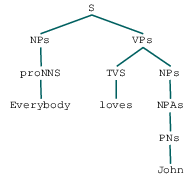

The sentence: 
A boy loves Mary
The parse tree: 
(S
  (NPs (DETNs (DETCNCs (DETCs A) (NCS boy))))
  (VPs (TVS loves) (NPs (NPAs (PNs Mary))))) 



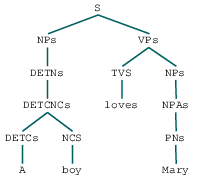

The sentence: 
The boy loves Mary
The parse tree: 
(S
  (NPs (DETNs (DETNCNs (DETNC The) (Ns (NCS boy)))))
  (VPs (TVS loves) (NPs (NPAs (PNs Mary))))) 



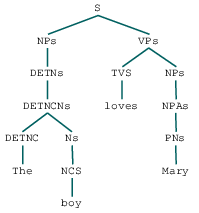

The sentence: 
Some boys love Mary
The parse tree: 
(S
  (NPp (DETNp (DETCNCp (DETCp Some) (NCP boys))))
  (VPp (TVP love) (NPs (NPAs (PNs Mary))))) 



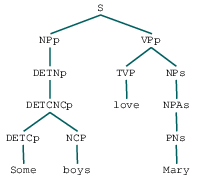

The sentence: 
John gave Mary a heavy book
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs
    (TVG gave)
    (NPs (NPAs (PNs Mary)))
    (NPs (DETNs (DETCNCs (DETCs a) (ADJ heavy) (NCS book)))))) 



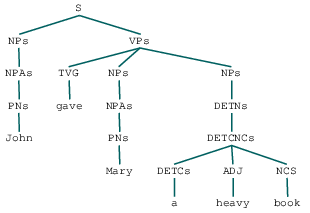

The sentence: 
John gave it to Mary
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs
    (TVG gave)
    (PPNs
      (NPs (NPAs (ProNA it)))
      (PPs (Prep to) (NPs (NPAs (PNs Mary))))))) 



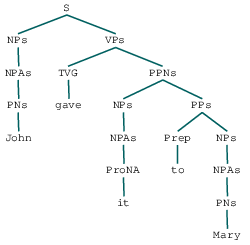

The sentence: 
John likes butter
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs (TVS likes) (NPs (NPAs (Ns (NM butter)))))) 



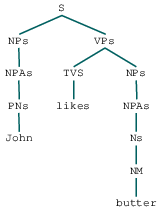

The sentence: 
John moves a chair
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs (TVS moves) (NPs (DETNs (DETCNCs (DETCs a) (NCS chair)))))) 



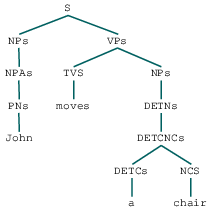

In [3]:
sg = """
S -> NPp VPp | NPs VPs
DETNCNp -> DETNC Np 
NPAp -> Np | ProNA
DETNp ->  DETCNCp | DETNCNp
DETCNCp -> DETCp NCP |DETCp ADJ NCP
Np -> NCP | NM
NCS -> 'boy' | 'book' | 'chair'
NCP -> 'boys'
NM -> "bread" |'butter'
PNs -> 'Mary' | 'John' 
ProNA ->  'her' | 'them' |'it'
proNNP -> 'They'
proNNS -> 'She' |'Everybody'
IV -> 'left'
TV -> TVS | TVP | TVG
TVG -> 'gave'
TVS -> 'eats' | 'loves' |'likes' |'moves'
TVP -> 'love'
DETCs -> 'A' |'a'
DETCp -> 'Some' 
DETNC -> 'The'
PPNp -> NPp PPp
PPp -> Prep NPp 
Prep -> 'to'
ADJ -> 'heavy'
NPp -> NPAp | proNNP | DETNp
VPp -> IV | TVP NPp NPp | TVP NPp | TVP PPNp | TVP NPs
DETNCNs -> DETNC Ns 
NPAs -> Ns | ProNA | PNs 
DETNs ->  DETCNCs | DETNCNs
DETCNCs -> DETCs NCS |DETCs ADJ NCS
Ns -> NCS | NM
PPNs -> NPs PPs
PPs -> Prep NPs 
NPs -> NPAs | proNNS | DETNs
VPs -> IV | TVS NPs NPs | TVS NPs | TVS PPNs |TVS NPp |TVG NPs NPs | TVG PPNs
"""

g = CFG.fromstring(sg)
sr_parser = nltk.ChartParser(g)

def parse_sentence(sent):
    tokens = sent.split()
    trees = sr_parser.parse(tokens)
    for tree in trees:
        print("The sentence: ")
        print(sent)
        print("The parse tree: ")
        print(tree, "\n")
        IPython.core.display.display(tree)
        break
        

for s in sentences:
    parse_sentence(s)

Next, we want to show that our grammar overgenerates.

"John loves She" is an ungrammatical sentence but our grammar recognizes as grammatical:

The sentence: 
John loves She
The parse tree: 
(S (NPs (NPAs (PNs John))) (VPs (TVS loves) (NPs (proNNS She)))) 



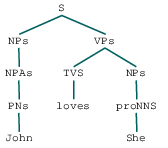

In [4]:
parse_sentence( "John loves She")

### Question 1.2: Extend a CFG to support Coordination and Prepositional Phrases

The sentence: 
John left
The parse tree: 
(S (NPs (NPAs (PNs John))) (VPs (IV left))) 



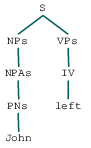

The sentence: 
John eats bread
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs (TVS eats) (NPs (NPAs (Ns (NM bread)))))) 



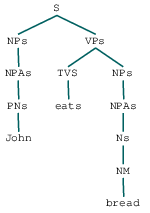

The sentence: 
John loves Mary
The parse tree: 
(S (NPs (NPAs (PNs John))) (VPs (TVS loves) (NPs (NPAs (PNs Mary))))) 



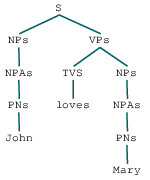

The sentence: 
They love Mary
The parse tree: 
(S (NPp (proNNP They)) (VPp (TVP love) (NPs (NPAs (PNs Mary))))) 



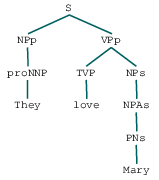

The sentence: 
They love her
The parse tree: 
(S (NPp (proNNP They)) (VPp (TVP love) (NPs (NPAs (ProNA her))))) 



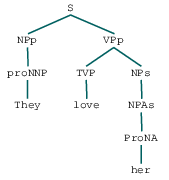

The sentence: 
She loves them
The parse tree: 
(S (NPs (proNNS She)) (VPs (TVS loves) (NPs (NPAs (ProNA them))))) 



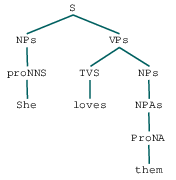

The sentence: 
Everybody loves John
The parse tree: 
(S
  (NPs (proNNS Everybody))
  (VPs (TVS loves) (NPs (NPAs (PNs John))))) 



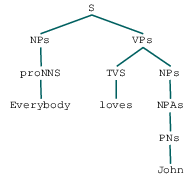

The sentence: 
A boy loves Mary
The parse tree: 
(S
  (NPs (DETNs (DETCNCs (DETCs A) (NCS boy))))
  (VPs (TVS loves) (NPs (NPAs (PNs Mary))))) 



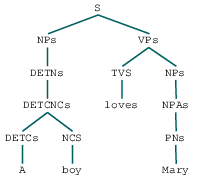

The sentence: 
The boy loves Mary
The parse tree: 
(S
  (NPs (DETNs (DETNCNs (DETNC The) (Ns (NCS boy)))))
  (VPs (TVS loves) (NPs (NPAs (PNs Mary))))) 



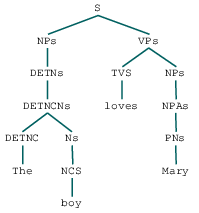

The sentence: 
Some boys love Mary
The parse tree: 
(S
  (NPp (DETNp (DETCNCp (DETCp Some) (NCP boys))))
  (VPp (TVP love) (NPs (NPAs (PNs Mary))))) 



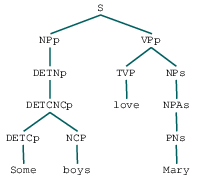

The sentence: 
John gave Mary a heavy book
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs
    (TVG gave)
    (NPs (NPAs (PNs Mary)))
    (NPs (DETNs (DETCNCs (DETCs a) (ADJ heavy) (NCS book)))))) 



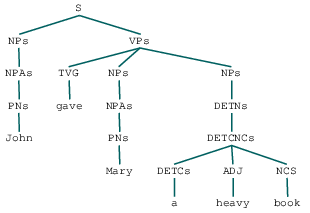

The sentence: 
John gave it to Mary
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs
    (TVG gave)
    (NPs (NPAs (ProNA it)))
    (PPs (Prep to) (NPs (NPAs (PNs Mary)))))) 



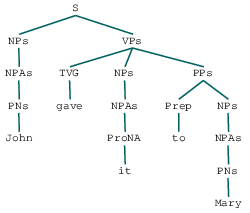

The sentence: 
John likes butter
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs (TVS likes) (NPs (NPAs (Ns (NM butter)))))) 



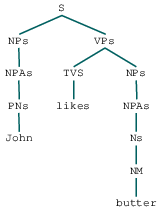

The sentence: 
John moves a chair
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs (TVS moves) (NPs (DETNs (DETCNCs (DETCs a) (NCS chair)))))) 



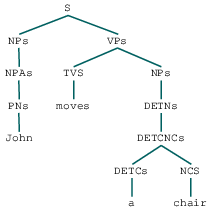

The sentence: 
John saw a man with a telescope
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs
    (TVG saw)
    (NPs (DETNs (DETCNCs (DETCs a) (NCS man))))
    (PPs
      (Prep with)
      (NPs (DETNs (DETCNCs (DETCs a) (NCS telescope))))))) 



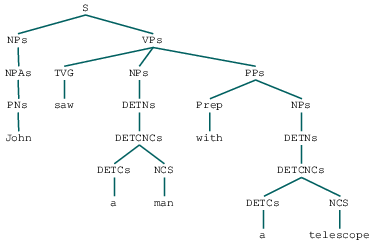

The sentence: 
John saw a man on the hill with a telescope
The parse tree: 
(S
  (NPs (NPAs (PNs John)))
  (VPs
    (TVG saw)
    (NPs (DETNs (DETCNCs (DETCs a) (NCS man))))
    (PPs
      (Prep on)
      (NPs (DETNs (DETNCNs (DETNC the) (Ns (NCS hill))))))
    (PPs
      (Prep with)
      (NPs (DETNs (DETCNCs (DETCs a) (NCS telescope))))))) 



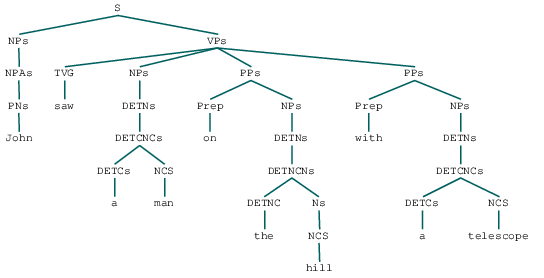

The sentence: 
Mary knows men and women
The parse tree: 
(S
  (NPs (NPAs (PNs Mary)))
  (VPs
    (TVS knows)
    (NPp
      (NPp (NPAp (Np (NCP men))))
      (CONJ and)
      (NPp (NPAp (Np (NCP women))))))) 



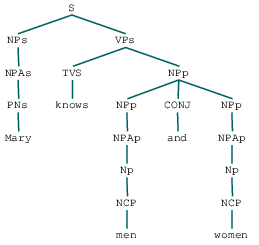

The sentence: 
Mary knows men, children and women
The parse tree: 
(S
  (NPs (NPAs (PNs Mary)))
  (VPs
    (TVS knows)
    (NPp
      (NPp
        (NPp (NPAp (Np (NCP men))))
        (PUNC ,)
        (NPp (NPAp (Np (NCP children)))))
      (CONJ and)
      (NPp (NPAp (Np (NCP women))))))) 



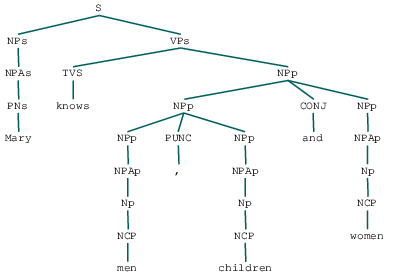

The sentence: 
John and Mary eat bread
The parse tree: 
(S
  (NPp (NPs (NPAs (PNs John))) (CONJ and) (NPs (NPAs (PNs Mary))))
  (VPp (TVP eat) (NPs (NPAs (Ns (NM bread)))))) 



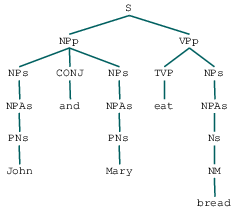

The sentence: 
John and Mary eat bread with cheese
The parse tree: 
(S
  (NPp (NPs (NPAs (PNs John))) (CONJ and) (NPs (NPAs (PNs Mary))))
  (VPp
    (TVP eat)
    (PPNp
      (NPp (NPAp (Np (NM bread))))
      (PPp (Prep with) (NPp (NPAp (Np (NM cheese)))))))) 



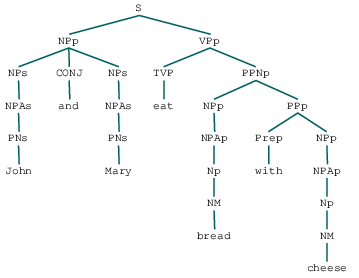

In [5]:
import re


sentences = ["John left", "John eats bread", "John loves Mary", "They love Mary", "They love her",
            "She loves them", "Everybody loves John", "A boy loves Mary",
            "The boy loves Mary", "Some boys love Mary", "John gave Mary a heavy book",
             "John gave it to Mary", "John likes butter", "John moves a chair",
             "John saw a man with a telescope", "John saw a man on the hill with a telescope",
             "Mary knows men and women", "Mary knows men, children and women",
             "John and Mary eat bread", "John and Mary eat bread with cheese"]


sg = """
S -> NPp VPp | NPs VPs
DETNCNp -> DETNC Np 
NPAp -> Np | ProNA
DETNp ->  DETCNCp | DETNCNp
DETCNCp -> DETCp NCP |DETCp ADJ NCP
Np -> NCP | NM
NCS -> 'boy' | 'book' | 'chair'| 'man' | 'telescope' | 'hill' 
NCP -> 'boys' | 'men' |'women' | 'children'
NM -> "bread" |'butter' |'cheese'
PNs -> 'Mary' | 'John' 
ProNA ->  'her' | 'them' |'it'
proNNP -> 'They'
proNNS -> 'She' |'Everybody'
IV -> 'left'
TVG -> 'gave' | 'saw'
TVS -> 'eats' | 'loves' |'likes' |'moves' | 'knows'
TVP -> 'love' | 'eat'
DETCs -> 'A' |'a'
DETCp -> 'Some' 
DETNC -> 'The' | 'the'
PPNp -> NPp PPp
PPp -> Prep NPp 
Prep -> 'to' |'with' | 'on'
ADJ -> 'heavy'
PUNC -> ','
NPp -> NPAp | proNNP | DETNp | | NPp CONJ NPp | NPs CONJ NPs | NPp PUNC NPp
VPp -> IV | TVP NPp NPp | TVP NPp | TVP PPNp | TVP NPs |TVG NPs | TVG NPp
DETNCNs -> DETNC Ns 
NPAs -> Ns | ProNA | PNs 
DETNs ->  DETCNCs | DETNCNs
DETCNCs -> DETCs NCS |DETCs ADJ NCS
Ns -> NCS | NM
PPNs -> NPs PPs
PPs -> Prep NPs 
CONJ -> 'and'
NPs -> NPAs | proNNS | DETNs
VPs -> TVG NPs PPs PPs |IV |TVS NPs NPs |TVS NPs |TVS PPNs |TVS NPp |TVG NPs |TVG NPp |TVG NPs PPs |TVG NPs NPs
"""


g = CFG.fromstring(sg)
sr_parser = nltk.ChartParser(g)

def parse_sentence(sent):
    tokens = re.findall(r"[\w']+|[.,!?;]", sent) #spilt by spaces and punctuation
    trees = sr_parser.parse(tokens)
    for tree in trees:
        print("The sentence: ")
        print(sent)
        print("The parse tree: ")
        print(tree, "\n")
        IPython.core.display.display(tree)
        break

for s in sentences:
       parse_sentence(s)



1.2.2 The number of coordinations such as "John and Mary", "John or Mary" are 7: 
and, but, for, nor, or, so, yet. 
We can put "the" in front of each mass noun or count noun so we have 4*7 options.
We can support such variations by adding the options of all the conjunctions to the CONJ rule. 


The sentence: 
John and She eat bread
The parse tree: 
(S
  (NPp (NPs (NPAs (PNs John))) (CONJ and) (NPs (proNNS She)))
  (VPp (TVP eat) (NPs (NPAs (Ns (NM bread)))))) 



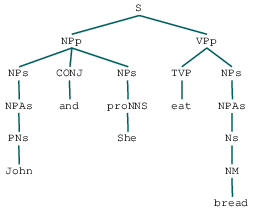

The sentence: 
her left
The parse tree: 
(S (NPs (NPAs (ProNA her))) (VPs (IV left))) 



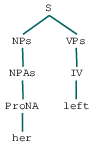

In [6]:
parse_sentence("John and She eat bread")

parse_sentence("her left")

# 2: Learning a PCFG from a Treebank

### 2.1: Random PCFG Generation

2.1.1 We'll create 1000 trees and store them in a file:

In [7]:
from nltk.grammar import Nonterminal
from nltk.grammar import toy_pcfg2
from nltk.probability import DictionaryProbDist
import itertools
from nltk.grammar import CFG
from nltk.parse import generate
import nltk
import itertools
import sys
from nltk.probability import ProbDistI, MLEProbDist, FreqDist
from nltk.tree import Tree

productions = toy_pcfg2.productions()

# Get all productions with LHS=NP
s_productions = toy_pcfg2.productions(Nonterminal('S'))
np_productions = toy_pcfg2.productions(Nonterminal('NP'))
vp_productions = toy_pcfg2.productions(Nonterminal('VP'))
pp_productions = toy_pcfg2.productions(Nonterminal('PP'))
v_productions = toy_pcfg2.productions(Nonterminal('V'))
n_productions = toy_pcfg2.productions(Nonterminal('N'))
name_productions = toy_pcfg2.productions(Nonterminal('Name'))
p_productions = toy_pcfg2.productions(Nonterminal('P'))
det_productions = toy_pcfg2.productions(Nonterminal('Det'))



s_dict = {}
for pr in s_productions: s_dict[pr.rhs()] = pr.prob()
s_probDist = DictionaryProbDist(s_dict)

np_dict = {}
for pr in np_productions: np_dict[pr.rhs()] = pr.prob()
np_probDist = DictionaryProbDist(np_dict)

vp_dict = {}
for pr in vp_productions: vp_dict[pr.rhs()] = pr.prob()
vp_probDist = DictionaryProbDist(vp_dict)

pp_dict = {}
for pr in pp_productions: pp_dict[pr.rhs()] = pr.prob()
pp_probDist = DictionaryProbDist(pp_dict)

v_dict = {}
for pr in v_productions: v_dict[pr.rhs()] = pr.prob()
v_probDist = DictionaryProbDist(v_dict)

n_dict = {}
for pr in n_productions: n_dict[pr.rhs()] = pr.prob()
n_probDist = DictionaryProbDist(n_dict)

name_dict = {}
for pr in name_productions: name_dict[pr.rhs()] = pr.prob()
name_probDist = DictionaryProbDist(name_dict)

p_dict = {}
for pr in p_productions: p_dict[pr.rhs()] = pr.prob()
p_probDist = DictionaryProbDist(p_dict)

det_dict = {}
for pr in det_productions: det_dict[pr.rhs()] = pr.prob()
det_probDist = DictionaryProbDist(det_dict)

def terminal(word):
    return str(word) == 'saw' or word == 'ate' or word == 'ran' or word == 'boy' or word == 'cookie' or word == 'table' or word == 'telescope' or word == 'hill' or word == 'Jack' or word == 'Bob' or word == 'with' or word == 'under' or word == 'the' or word == 'a' or word == 'many' or word == 'my'

def pcfg_generate_helper(child):
  child_list = []
  if str(child) == 'VP':
      for i in vp_probDist.generate():
          child_list.append(pcfg_generate_helper(i))
      return (Tree(str(child), child_list))
  elif str(child) == 'NP':
      for i in np_probDist.generate():
          child_list.append(pcfg_generate_helper(i))
      return (Tree(str(child), child_list))
  elif str(child) == 'PP':
      for i in pp_probDist.generate():
          child_list.append(pcfg_generate_helper(i))
      return (Tree(str(child), child_list))
  elif str(child) == 'V':
    for i in v_probDist.generate():
        if(terminal(i)):
            #child = str(child)
            #child += " " +  str(i)
            return [Tree(child, [str(i)])]
        else:
            return (Tree(str(child), pcfg_generate_helper(i)))
  elif str(child) == 'N':
    for i in n_probDist.generate():
        if(terminal(i)):
            #child = str(child)
            #child += " " +  str(i)
            return [Tree(child, [str(i)])]
        else:
          return (Tree(str(child), pcfg_generate_helper(i)))
  elif str(child) == 'Name':
    for i in name_probDist.generate():
        if(terminal(i)):
            #child = str(child)
            #child += " " +  str(i)
            return [Tree(child, [str(i)])]
        else:
          return (Tree(str(child), pcfg_generate_helper(i)))
  elif str(child) == 'P':
    for i in p_probDist.generate():
        if(terminal(i)):
            #child = str(child)
            #child += " " +  str(i)
            return [Tree(child, [str(i)])]
        else:
          return (Tree(str(child), pcfg_generate_helper(i)))
  elif str(child) == 'Det':
    for i in det_probDist.generate():
        if(terminal(i)):
            #child = str(child)
            #child += " " +  str(i)
            return [Tree(child, [str(i)])]
        else:
          return (Tree(str(child), pcfg_generate_helper(i)))
  
    


# return a tree sampled from the language described by the PCFG grammar
def pcfg_generate(grammar):
  child_list = list()

  for i in s_probDist.generate():
    child_list.append(pcfg_generate_helper(i))

  return Tree('S', child_list)

  
toy_file = open("toy_pcfg2.gen", 'w+')
for i in range(0, 1000):
  toy_file.write(str(pcfg_generate(nltk.grammar.toy_pcfg2)))
  toy_file.write("\n=====\n")


2.1.2 Let's Compute the frequency distribution of each non-terminal and pre-terminal in the generated corpus:

In [8]:
from matplotlib import pyplot

tree_str = open("toy_pcfg2.gen", 'r').read().split('\n=====\n')
np_count = []
vp_count = []
pp_count = []
v_count = []
n_count = []
name_count = []
p_count = []
det_count = []
np_counter = 0
vp_counter = 0
pp_counter = 0
v_counter = 0
n_counter = 0
name_counter = 0
p_counter = 0
det_counter = 0

for tree in tree_str:
  np_counter += tree.count('NP')
  vp_counter += tree.count('VP')
  pp_counter += tree.count('PP')
  v_counter += tree.count('V')
  n_counter += tree.count('N')
  name_counter += tree.count('Name')
  p_counter += tree.count('P')
  det_counter += tree.count('Det')


for tree in tree_str:
  np_count.append(tree.count('NP') / np_counter)
  vp_count.append(tree.count('VP') / vp_counter)
  pp_count.append(tree.count('PP') / pp_counter)
  v_count.append(tree.count('V') / v_counter)
  n_count.append(tree.count('N') / n_counter)
  name_count.append(tree.count('Name') / name_counter)
  p_count.append(tree.count('P') / p_counter)
  det_count.append(tree.count('Det') / det_counter)
  

print("np_freq_count:", np_count)
print("vp_freq_count:", vp_count)
print("pp_freq_count:", pp_count)
print("v_freq_count:", v_count)
print("n_freq_count:", n_count)
print("name_freq_count:", name_count)
print("p_freq_count:", p_count)
print("det_freq_count:", det_count)

np_freq_count: [0.00045392646391284613, 0.00045392646391284613, 0.0015887426236949613, 0.00045392646391284613, 0.00022696323195642307, 0.00045392646391284613, 0.00022696323195642307, 0.0027235587834770767, 0.00045392646391284613, 0.00045392646391284613, 0.0009078529278256923, 0.0009078529278256923, 0.0009078529278256923, 0.00045392646391284613, 0.00022696323195642307, 0.0009078529278256923, 0.00045392646391284613, 0.0006808896958692692, 0.00022696323195642307, 0.0013617793917385383, 0.0020426690876078077, 0.00045392646391284613, 0.00045392646391284613, 0.003631411711302769, 0.0027235587834770767, 0.00045392646391284613, 0.0022696323195642307, 0.00022696323195642307, 0.00045392646391284613, 0.00022696323195642307, 0.00022696323195642307, 0.0006808896958692692, 0.00022696323195642307, 0.00022696323195642307, 0.0031774852473899226, 0.00045392646391284613, 0.00045392646391284613, 0.00045392646391284613, 0.00045392646391284613, 0.0015887426236949613, 0.00022696323195642307, 0.00045392646391

2.1.3 Now let's calculate the KL-Divergence for each of the non-terminals:

In [9]:
import math

np_fd = FreqDist(np_count)
np_mle = MLEProbDist(np_fd)

kl_divergence_np = 0
for prob in np_count:
  for samp in np_mle.samples():
    if samp != 0 and prob != 0:
        kl_divergence_np += prob * math.log(prob / samp)

print("kl_divergence_np:", kl_divergence_np)

vp_fd = FreqDist(vp_count)
vp_mle = MLEProbDist(vp_fd)

kl_divergence_vp = 0
for prob in vp_count:
  for samp in vp_mle.samples():
    if samp != 0 and prob != 0:
      kl_divergence_np += prob * math.log(prob / samp)

print("kl_divergence_vp:", kl_divergence_vp)

pp_fd = FreqDist(pp_count)
pp_mle = MLEProbDist(pp_fd)

kl_divergence_pp = 0
for prob in pp_count:
  for samp in pp_mle.samples():
    if samp != 0 and prob != 0:
         kl_divergence_pp += prob * math.log(prob / samp)
    

print("kl_divergence_pp:", kl_divergence_pp)

v_fd = FreqDist(v_count)
v_mle = MLEProbDist(v_fd)

kl_divergence_v = 0
for prob in v_count:
  for samp in v_mle.samples():
    if samp != 0 and prob != 0:
      kl_divergence_v += prob * math.log(prob / samp)

print("kl_divergence_v:", kl_divergence_v)

n_fd = FreqDist(n_count)
n_mle = MLEProbDist(n_fd)

kl_divergence_n = 0
for prob in n_count:
  for samp in n_mle.samples():
    if samp != 0 and prob != 0:
      kl_divergence_n += prob * math.log(prob / samp)

print("kl_divergence_n:", kl_divergence_n)

name_fd = FreqDist(name_count)
name_mle = MLEProbDist(name_fd)

kl_divergence_name = 0
for prob in name_count:
  for samp in name_mle.samples():
    if samp != 0 and prob != 0:
      kl_divergence_name += prob * math.log(prob / samp)

print("kl_divergence_name:", kl_divergence_name)

p_fd = FreqDist(p_count)
p_mle = MLEProbDist(p_fd)

kl_divergence_p = 0
for prob in p_count:
  for samp in p_mle.samples():
    if samp != 0 and prob != 0:
      kl_divergence_p += prob * math.log(prob / samp)

print("kl_divergence_p:", kl_divergence_p)

det_fd = FreqDist(det_count)
det_mle = MLEProbDist(det_fd)

kl_divergence_det = 0
for prob in det_count:
  for samp in det_mle.samples():
    if samp != 0 and prob != 0:
      kl_divergence_det += prob * math.log(prob / samp)

print("kl_divergence_det:", kl_divergence_det)

kl_divergence_np: -21.54200574989333
kl_divergence_vp: 0
kl_divergence_pp: -10.915205391622482
kl_divergence_v: -0.3992936452754623
kl_divergence_n: -22.47925886254426
kl_divergence_name: -7.56727671468584
kl_divergence_p: -20.01650080711138
kl_divergence_det: -13.754929614242057


2.1.4: Our observations are that all the KL-divergences are not very large, hence there is not such a big difference between our distribution and that of MLE.

# 2.2: Learn a PCFG from a Treebank

The implementation of pcfg_learn(treebank, n):

In [10]:
import nltk
from nltk.corpus import LazyCorpusLoader, BracketParseCorpusReader
from nltk.corpus import treebank


def simplify_functional_tag(tag):
    if '-' in tag:
        tag = tag.split('-')[0]
    return tag

treebank = LazyCorpusLoader('treebank/combined', BracketParseCorpusReader, r'wsj_.*\.mrg')



from nltk import induce_pcfg
from nltk.grammar import Production, ProbabilisticProduction
from nltk import Tree, Nonterminal
from matplotlib import pyplot

def get_tag(tree):
    if isinstance(tree, Tree):
        return Nonterminal(simplify_functional_tag(tree.label()))
    else:
        return tree

def tree_to_production(tree):
    return nltk.Production(get_tag(tree), [get_tag(child) for child in tree ])

def tree_to_productions(tree):
    yield tree_to_production(tree)
    for child in tree:
        if isinstance(child, Tree):
            if child.label() == "-NONE-":
                continue
            for prod in tree_to_productions(child):
                yield prod



def pcfg_learn(treebank, n):
    #-- treebank is the nltk.corpus.treebank lazy corpus reader
    #-- n indicates the number of trees to read
    #-- return an nltk.PCFG instance
    trees = []
    all_productions = []
    for i in range(0, n):
        productions = tree_to_productions(treebank.parsed_sents()[i])
        pcount = {}
        lcount = {}
        for prod in productions:
            lcount[prod.lhs()] = lcount.get(prod.lhs(), 0) + 1
            pcount[prod] = pcount.get(prod, 0) + 1

        prods = [
            ProbabilisticProduction(p.lhs(), p.rhs(), prob=pcount[p] / lcount[p.lhs()])
            for p in pcount
        ]
        #trees.append(nltk.PCFG(Nonterminal('S'), prods))
        all_productions.append(prods)
    all_productions = [item for sublist in all_productions for item in sublist]
    return induce_pcfg(Nonterminal('S'),all_productions)


2.2.1 The number of productions that are learned from the trees are 4,011. The number of interior nodes that were in the treebank are 9,020.

2.2.2 Now let's draw a plot of the distribution of productions according to their frequency (number of rules with frequency 1, 2, ...):

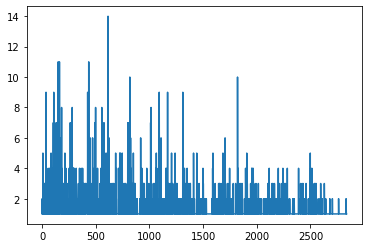

In [11]:
return_prods_200 = pcfg_learn(treebank, 200).productions()
productions = {}
for prod in return_prods_200:
    productions[prod] = 0


for prod in return_prods_200:
    productions[prod] += 1

plt_vals = []
for prod in productions:
    plt_vals.append(productions[prod])

pyplot.plot(plt_vals)
pyplot.show()

We observe that as we go forward with the rules, there are lower columns, meaning leater rules appear less than first rules (except slight jumps of the column here and there).

Let's compare the one of 200 trees that we have induced to a one of 400 trees:

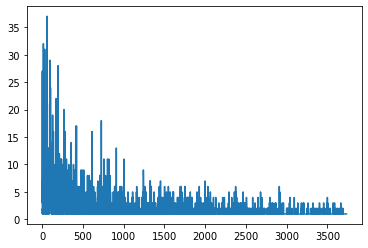

In [12]:
return_prods_400 = pcfg_learn(treebank, 400).productions()

productions2 = {}
for prod in return_prods_400:
    productions2[str(prod.lhs()) + "->" + str(prod.rhs())] = 0

for prod in return_prods_400:
    productions2[str(prod.lhs()) + "->" + str(prod.rhs())] += 1

plt_vals2 = []
for prod in productions2:
    plt_vals2.append(productions2[prod])

pyplot.plot(plt_vals2)
pyplot.show()

We can obtain that as we move forward with the rules we see them in less and less frequency, even in a more salient change than in the previous graph.

# 2.3: Induce a PCFG in Chomsky Normal Form

2.3.1 The implementation of pcfg_cnf_learn:

In [13]:
from nltk.treetransforms import chomsky_normal_form

def pcfg_cnf_learn(treebank, n):
    #-- treebank is the nltk.corpus.treebank lazy corpus reader
    #-- n indicates the number of trees to read
    #-- return an nltk.PCFG instance
    trees = []
    all_productions = []
    for i in range(0, n):
        tree = treebank.parsed_sents()[i]
        chomsky_normal_form(tree, factor='right', horzMarkov=1, vertMarkov=1, childChar='|', parentChar='^')
        productions = tree_to_productions(tree)
        pcount = {}
        lcount = {}
        for prod in productions:
            lcount[prod.lhs()] = lcount.get(prod.lhs(), 0) + 1
            pcount[prod] = pcount.get(prod, 0) + 1

        prods = [
            ProbabilisticProduction(p.lhs(), p.rhs(), prob=pcount[p] / lcount[p.lhs()])
            for p in pcount
        ]
        #trees.append(nltk.PCFG(Nonterminal('S'), prods))
        all_productions.append(prods)
    all_productions = [item for sublist in all_productions for item in sublist]
    return induce_pcfg(Nonterminal('S'),all_productions)

2.3.2 The number of productions that are learned from the CNF trees is 4590. There were 9,020 intreior nodes  in the original treebank, and 10,702 interior nodes in the CNF treebank.

2.3.3 The ratio between the number of productions that are learned not in Chomsky Normal Form to that of Chomsky Normal Form is 4,011 / 4,590 = 0.87385620915. The ratio between the number of interior node not in Chomsky Normal Form to that of Chomsly Normal Form is 9,020 / 10,702 = 0.8428331153. We conclude that Chomsky Normal Form adds nodes to the treebank and therefore adds productions to the learned data.

### 2.4: Test CFG Independence Assumptions

2.4.1, 2.4.2, 2.4.3: Let's compute the distributions and plot the graphs: 

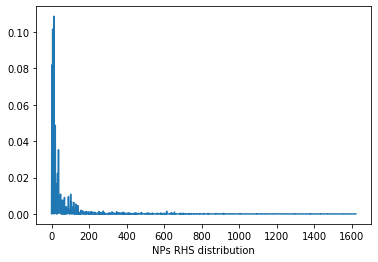

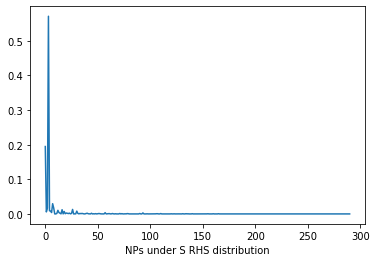

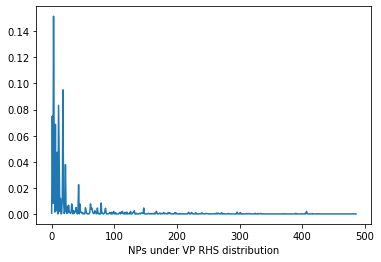

In [14]:
import nltk
from nltk.corpus import LazyCorpusLoader, BracketParseCorpusReader
from nltk.corpus import treebank
from matplotlib import pyplot


def simplify_functional_tag(tag):
    if '-' in tag:
        tag = tag.split('-')[0]
    return tag

treebank = LazyCorpusLoader('treebank/combined', BracketParseCorpusReader, r'wsj_.*\.mrg')




from nltk.grammar import Production, ProbabilisticProduction
from nltk import Tree, Nonterminal
from matplotlib import pyplot

def get_tag(tree):
    if isinstance(tree, Tree):
        return Nonterminal(simplify_functional_tag(tree.label()))
    else:
        return tree

def tree_to_production(tree):
    return Production(get_tag(tree), [get_tag(child) for child in tree if (get_tag(child != 'none') and get_tag(child != 'noneexecutive'))])

def tree_to_productions(tree):
    yield tree_to_production(tree)
    for child in tree:
        if isinstance(child, Tree):
            for prod in tree_to_productions(child):
                yield prod

count_rhss = {}
for tree in treebank.parsed_sents():
    productions_lhs = tree_to_productions(tree)
    for prod in productions_lhs:
        if str(prod.lhs()) == 'NP':
            count_rhss[prod.rhs()] = 0
    

for tree in treebank.parsed_sents():
    productions_lhs = tree_to_productions(tree)
    for prod in productions_lhs:
        if str(prod.lhs()) == 'NP':
            count_rhss[prod.rhs()] += 1


x_vals = []
sum_vals = 0
for val in count_rhss.values():
    sum_vals += val
for key in count_rhss.keys():
    count_rhss[key] = count_rhss[key] / sum_vals
for val in count_rhss.values():
    x_vals.append(val)
pyplot.plot(x_vals)
pyplot.xlabel('NPs RHS distribution')
pyplot.show()

count_rhss_nps = {}
for tree in treebank.parsed_sents():
    productions_lhs = tree_to_productions(tree)
    for prod in productions_lhs:
        if str(prod.lhs()) == 'S':
             if 'NP' in str(prod.rhs()):
                count_rhss_nps[prod.rhs()] = 0
    

for tree in treebank.parsed_sents():
    productions_lhs = tree_to_productions(tree)
    for prod in productions_lhs:
        if str(prod.lhs()) == 'S':
             if 'NP' in str(prod.rhs()):
                count_rhss_nps[prod.rhs()] += 1


x_nps_vals = []
sum_vals = 0
for val in count_rhss_nps.values():
    sum_vals += val
for key in count_rhss_nps.keys():
    count_rhss_nps[key] = count_rhss_nps[key] / sum_vals
for val in count_rhss_nps.values():
    x_nps_vals.append(val)
pyplot.plot(x_nps_vals)
pyplot.xlabel('NPs under S RHS distribution')
pyplot.show()

count_rhss_npvp = {}
for tree in treebank.parsed_sents():
    productions_lhs = tree_to_productions(tree)
    for prod in productions_lhs:
        if str(prod.lhs()) == 'VP':
            if 'NP' in str(prod.rhs()):
                count_rhss_npvp[prod.rhs()] = 0
    

for tree in treebank.parsed_sents():
    productions_lhs = tree_to_productions(tree)
    for prod in productions_lhs:
        if str(prod.lhs()) == 'VP':
              if 'NP' in str(prod.rhs()):
                count_rhss_npvp[prod.rhs()] += 1

x_npvp_vals = []
sum_vals = 0
for val in count_rhss_npvp.values():
    sum_vals += val
for key in count_rhss_npvp.keys():
    count_rhss_npvp[key] = count_rhss_npvp[key] / sum_vals
for val in count_rhss_npvp.values():
    x_npvp_vals.append(val)
pyplot.plot(x_npvp_vals)
pyplot.xlabel('NPs under VP RHS distribution')
pyplot.show()

Now we will compute the KL-divergence between the distributions:

In [15]:
import math


kl_divergence_nps = 0
for prob in x_vals:
  for qprob in x_nps_vals:
    if qprob != 0 and prob != 0:
        kl_divergence_nps += prob * math.log(prob / qprob)

print("kl_divergence between np s:", kl_divergence_nps)



kl_divergence_npvp = 0
for prob in x_nps_vals:
  for qprob in x_npvp_vals:
    if qprob != 0 and prob != 0:
        kl_divergence_npvp += prob * math.log(prob / qprob)

print("kl_divergence between np vp:", kl_divergence_npvp)



kl_divergence_svp = 0
for prob in x_vals:
  for qprob in x_npvp_vals:
    if qprob != 0 and prob != 0:
        kl_divergence_svp += prob * math.log(prob / qprob)
    

print("kl_divergence between s vp:", kl_divergence_svp)

kl_divergence between np s: 1166.4266370788637
kl_divergence between np vp: 2920.1934453444014
kl_divergence between s vp: 1742.9913937585159


2.4.5 The data in the treebank doesn't confirms the CFG hypothesis for each configuration that a node expansion is independent from its location within a tree, because we obtain a big difference between the appearence of each rule, which means that there is a dependency between the node expansion and its location in the tree.

## Question 3: Building and Evaluating a Simple PCFG Parser

### Question 3.1: Build a Parser

First, lets add some helper functions that will help us simplify the trees and remove the -NONE- nodes.

In [16]:
import nltk
from nltk import Nonterminal
from nltk import induce_pcfg
import nltk.parse.viterbi
from nltk.corpus import LazyCorpusLoader, BracketParseCorpusReader
from nltk import Tree

def remove_none(tree):
    for ind, leaf in reversed(list(enumerate(tree.leaves()))):
        postn = tree.leaf_treeposition(ind)
        parentpos = postn[:-1]
        if tree[parentpos].label() == "-NONE-":
            postn = tree.leaf_treeposition(ind)
            parentpos = postn[:-1]
            while parentpos and len(tree[parentpos]) == 1:
                postn = parentpos
                parentpos = postn[:-1]
            del tree[postn]
            
def simplify_functional_tag(tag):
    if '-' in tag:
        tag = tag.split('-')[0]
    if '|' in tag:
        tag = tag.split('|')[0]
    return tag

def simplify_tree_tags(tree):
    new_tag = simplify_functional_tag(tree.label())
    tree.set_label(new_tag)
    for child in tree:
        if isinstance(child, Tree):
            simplify_tree_tags(child)
            
def get_tag(tree):
    if isinstance(tree, Tree):
        return Nonterminal(simplify_functional_tag(tree.label()))
    else:
        return tree


Now, we'll split the NLTK treebank corpus and create a training and testing sets:

In [17]:
treebank = LazyCorpusLoader('treebank/combined', BracketParseCorpusReader, r'wsj_.*\.mrg')

test_trees = []
train_trees = []
i = 0
for item in treebank.fileids():
    for tree in treebank.parsed_sents(item):
        tree.collapse_unary(collapsePOS=False)  # Remove branches A-B-C into A-B+C
        tree.chomsky_normal_form(horzMarkov=2)  # Remove A->(B,C,D) into A->B,C+D->D
        remove_none(tree)
        simplify_tree_tags(tree)
        if i < 3200:
            train_trees.append(tree)
        else:
            test_trees.append(tree)
        i += 1

and create the productions:

In [18]:
def tree_to_production(tree):
    return nltk.Production(get_tag(tree), [get_tag(child) for child in tree])


def tree_to_productions(tree):
    yield tree_to_production(tree)
    for child in tree:
        if isinstance(child, Tree):
            if child.label() == "-NONE-":
                continue
            for prod in tree_to_productions(child):
                yield prod
                
all_productions = []
for t in train_trees:
    productions = tree_to_productions(t)
    all_productions += productions

An issue we would like to deal with at this point is that some words in the test trees will not be covered by our parser, therefore if we would try and create the parser based on the current productions it would likely result in ‘ValueError: Grammar does not cover some of the input words’.

Since the grammar is based on POS tags we will add the tokens and POS tags for our test set.

In [19]:
# get all the tokens from the test set
all_test_words = []
for t in test_trees:
    all_test_words += t.leaves()

tagged_words = nltk.pos_tag(all_test_words)

# get the POS->token rule by creating the tree (POS token)
for word, tag in tagged_words:
    t = nltk.Tree.fromstring("(" + tag + " " + word + ")")
    for prod in t.productions():
        all_productions.append(prod)
        
all_productions = list(set( all_productions))


Next, will move all the rules of type 'S'-> rhs to the beginning of the productions list (required by the parser to work): 

In [20]:
#move all S-> to the start
for prod in all_productions:
    if prod.lhs() == Nonterminal('S'):
        all_productions.remove(prod)
        all_productions.insert(0, prod)


Now we can create our viterbi parser:

In [21]:
grammar = induce_pcfg(Nonterminal('S'), all_productions)
viterbi_parser = nltk.ViterbiParser(grammar)

Now we would like to parse the test trees with our parser.
The parsing time for every tree is pretty long (about 3 minutes per tree) so we chose to parser the trees in advanced and save the result to files we can now use to accesses the trees conveniently.
we used the following function to create the files:

In [22]:
def parse_and_save():
    ID = 0
    for ref_tree in test_trees[ID:]:
        print("beginning to parse tree number " + str(ID))

        for t in viterbi_parser.parse(ref_tree.leaves()):
            filename = "parse_trees" + str(ID) + ".txt"
            with open(filename, "w") as f:
                print(t, file=f)
            break  # add the first tree and quit
        ID += 1

Let's add a function that create our parse trees set from the files and print some of them:

In [23]:
def get_test_trees_from_file(n):
    viterbi_test_trees = []
    for ID in range(n):
        filename = "./data/parse_trees" + str(ID) + ".txt"
        with open(filename, 'r') as file:
            s = file.read().replace('\n', '')
            # remove the probabilty for the tree from  the end of the string: (p=0.001)
            probindex = s.rfind('(')
            s = s[:probindex]
            t = Tree.fromstring(s)
            viterbi_test_trees.append(t)

    return viterbi_test_trees

viterbi_test_trees = get_test_trees_from_file(650)

### Question 3.2: Evaluate the Parser

3.2.1 get_constituents generate a list of labelled constituents of the form (label first_index last_index) given a parse tree.

In [24]:
def get_constituents(tree, tokens, constituents):
    leaves_len =len(tree.leaves())
    for index in (i for i, t in enumerate(tokens) if t == tree.leaves()[0]):
        if tokens[index:index+leaves_len] == tree.leaves():
            constituents.append((tree.label(),index,index+leaves_len))

    for child in tree:
        if isinstance(child, Tree) and child.height() > 1:
            constituents += get_constituents(child,tokens, constituents)

    return list(set(constituents))


3.2.2 Next, we'll use get_constituents to compute unlabeled Precision, Recall and F-measure for our parser on the test dataset:

In [25]:
def unlabeled_metrics(gold_const, cand_const):
    correct = 0
    for c1 in gold_const:
        for c2 in cand_const:
            if c1[:2] == c2[:2]:
                correct += 1
    Precision = correct / len(cand_const)
    Recall = correct / len(gold_const)
    Fmeasure = (2 * Precision * Recall) / (Precision + Recall)
    return (Precision, Recall, Fmeasure)


Precision = 0
Recall = 0
Fmeasure = 0
for i in range(len(viterbi_test_trees)):
    gold_const = get_constituents(test_trees[i], test_trees[i].leaves(), [])
    cand_const = get_constituents(viterbi_test_trees[i],viterbi_test_trees[i].leaves(), [])
    P, R, Fm = unlabeled_metrics(gold_const, cand_const)
    Precision += P
    Recall += R
    Fmeasure += Fm


print("Precision", Precision / len(viterbi_test_trees))
print("Recall: ", Recall / len(viterbi_test_trees))
print("Fmeasure:", Fmeasure / len(viterbi_test_trees))

Precision 0.5788542045138808
Recall:  0.5485256844955394
Fmeasure: 0.5629402391555808


3.2.3 In order to compute the labeled metrics we need to change the condition in which a constituent
considered 'correct' to include the label:

from: if c1[:2] == c2[:2] 
to: if c1 == c2

In [26]:
def labeled_metrics(gold_const, cand_const):
    correct = 0
    for c1 in gold_const:
        for c2 in cand_const:
            if c1 == c2:
                correct += 1
    Precision = correct / len(cand_const)
    Recall = correct / len(gold_const)
    Fmeasure = (2 * Precision * Recall) / (Precision + Recall)
    return (Precision, Recall, Fmeasure)

Precision = 0
Recall = 0
Fmeasure = 0
for i in range(len(viterbi_test_trees)):
    gold_const = get_constituents(test_trees[i], test_trees[i].leaves(), [])
    cand_const = get_constituents(viterbi_test_trees[i],viterbi_test_trees[i].leaves(), [])
    P, R, Fm = unlabeled_metrics(gold_const, cand_const)
    Precision += P
    Recall += R
    Fmeasure += Fm

print("Labelled Precision", Precision / len(viterbi_test_trees))
print("Labelled Recall: ", Recall / len(viterbi_test_trees))
print("Labelled Fmeasure:", Fmeasure / len(viterbi_test_trees))

Labelled Precision 0.5788542045138808
Labelled Recall:  0.5485256844955394
Labelled Fmeasure: 0.5629402391555808


### Question 3.3: Accuracy per Distance

We'll use two dictionaries, total_dict and correct_dict to count the number of total and accurate constituents for every length.

In [27]:
total_dict = {}
correct_dict = {}

#initialize the length dict
for i in range(100):
    total_dict[i] = 0
    correct_dict[i] = 0
    
for i in range(len(viterbi_test_trees)):
    gold_const = get_constituents(test_trees[i], test_trees[i].leaves(), [])
    cand_const = get_constituents(viterbi_test_trees[i], viterbi_test_trees[i].leaves(), [])
    for c1 in gold_const:
        for c2 in cand_const:
            # the length of a constituent is last-first+1
            l = c2[2] - c2[1] + 1 
            # if the constituent is correct add to the correct counter,
            # otherwise just add to the total counter
            if c1[:2] == c2[:2]:
                total_dict[l] += 1
                correct_dict[l] += 1
            else:
                total_dict[l] += 1

Next, we can use the dictionaries to compute the Accuracy per distance.

The Accuracy for a certain length is: correct_dict[length] / total_dict[length]

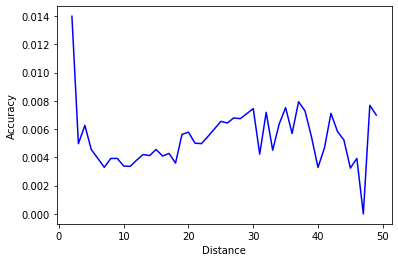

In [28]:
lengths = []
accuracies = []
for i in range(50):
    if total_dict[i]:
        lengths.append(i)
        accuracies.append(correct_dict[i]/total_dict[i])


import matplotlib.pyplot as plt
plt.plot(lengths, accuracies,'b')
plt.xlabel('Distance')
plt.ylabel('Accuracy')
plt.show()

### Question 3.4: Accuracy per Label

First, lets create a list of all the labels:

In [29]:
labels = []
for i in range(len(viterbi_test_trees)):
    cand_const = get_constituents(viterbi_test_trees[i], viterbi_test_trees[i].leaves(), [])
    for c in cand_const:
        labels.append(c[0])

labels = list(set(labels))

Again, we will create two dictionaries, total_dict and correct_dict to count the number of total and accurate constituents for every label.

In [30]:
total_dict = {}
correct_dict = {}

# initialize the labels dict
for label in labels:
    total_dict[label] = 0
    correct_dict[label] = 0

for i in range(len(viterbi_test_trees)):
    gold_const = get_constituents(test_trees[i], test_trees[i].leaves(), [])
    cand_const = get_constituents(viterbi_test_trees[i], viterbi_test_trees[i].leaves(), [])
    for c1 in gold_const:
        for c2 in cand_const:
            label = c2[0]
            # if the constituent is currect add to the correct counter,
            # otherwise just add to the total counter
            if c1[:2] == c2[:2]:
                total_dict[label] += 1
                correct_dict[label] += 1
            else:
                total_dict[label] += 1


for label in labels:
    print("The label: ", label)
    print("Number of occurrences: ", total_dict[label])
    print("Accuracy: ", correct_dict[label]/total_dict[label])

The label:  FRAG+SBAR
Number of occurrences:  352
Accuracy:  0.0
The label:  WHNP
Number of occurrences:  75795
Accuracy:  0.0007916089451810805
The label:  CC
Number of occurrences:  20689
Accuracy:  0.015128812412393059
The label:  WHADVP
Number of occurrences:  1790
Accuracy:  0.00782122905027933
The label:  VBN
Number of occurrences:  22725
Accuracy:  0.009064906490649064
The label:  FRAG+ADVP
Number of occurrences:  1322
Accuracy:  0.0
The label:  QP
Number of occurrences:  41398
Accuracy:  0.005435045171264312
The label:  VBP
Number of occurrences:  11562
Accuracy:  0.00467047223663726
The label:  PP=3
Number of occurrences:  12122
Accuracy:  0.0
The label:  NNPS
Number of occurrences:  3548
Accuracy:  0.009864712514092447
The label:  NP+NP
Number of occurrences:  51053
Accuracy:  0.0
The label:  NNS
Number of occurrences:  51647
Accuracy:  0.01665149960307472
The label:  DT
Number of occurrences:  77649
Accuracy:  0.01546703756648508
The label:  PDT
Number of occurrences:  1347
